In [105]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [112]:
def bandit(means, epsilon, steps, std=1):
    k = means.size
    Q = np.zeros(k)
    N = np.zeros(k)
    
    step_result = np.zeros(steps)
    
    for step in range(steps):
        pick_best = np.random.choice([True, False], p=[1 - epsilon, epsilon])
        A = np.argmax(Q) if pick_best else np.random.choice(range(k))
        R = np.random.normal(means[A], std)
        N[A] += 1
        Q[A] += (R - Q[A]) / N[A]
        step_result[step] = np.sum(Q * N) / np.sum(N)
    
    return step_result

In [113]:
steps = 1000
games = 200
epsilons = [0, 0.01, 0.1, 0.2]

  0%|          | 0/200 [00:00<?, ?it/s]

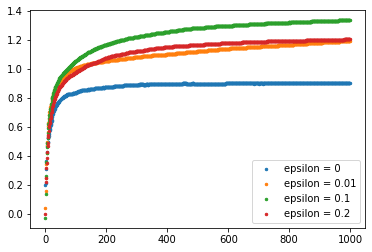

In [114]:
y_values = np.empty((len(epsilons), steps))

for g in tqdm(range(1, games + 1)):
    for i_e, e in enumerate(epsilons):
        means = np.random.normal(0, 1, 10)
        y_values[i_e] = (y_values[i_e] * (g - 1) + bandit(means, e, steps)) / g

for e, y in zip(epsilons, y_values):
    plt.scatter(range(steps), y, label=f'epsilon = {e}', s=6)

plt.legend()